In [2]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib.request
import urllib.error
import bs4 #this is beautiful soup
import time
import operator
import socket
import _pickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from secret import *
from pypac import PACSession
session = PACSession()
import csv
import io

# API registrations

If you would like to run all the examples in this notebook, you need to register for the following APIs:

* Rotten Tomatoes - http://developer.rottentomatoes.com/member/register
* Twitter - https://apps.twitter.com/app/new
* Twitter instructions - https://twittercommunity.com/t/how-to-get-my-api-key/7033

# Todays lecture:

* introduction to pandas
*  read a table
*  do some plots
* all about data scraping
* ***What is it?***
* How to do it:
*  from a website
*  with an API

# IPython Notebooks:¶

* These slides are an IPython notebook!
* https://github.com/damianavila/live_reveal

In [3]:
print ("Hello CS109")

print ("I love IPython")

# IPython notebook has tab completion!
# and inbuild help

a = np.zeros(3)

a.clip?

Hello CS109
I love IPython


# General advice about programming

* You will find nearly everything on google
* Try: length of a list in python
* A programmer is someone who can turn stack overflow snippets into running code
* Use tab completion
* Make your variable names meaningful

# How to load a table

* we use Pandas for this
* Pandas can do a lot more
* more about it later

# The MovieLens data

http://grouplens.org/datasets/movielens/

Grouplens

Example inspired by Greg Reda

# Read the user data¶

In [4]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'C:/Users/502689880/Downloads/2015-master/users.csv',
    names=u_cols)

users.head()

FileNotFoundError: File b'C:/Users/502689880/Downloads/2015-master/users.csv' does not exist

# Read the ratings

In [5]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'C:/Users/502689880/Downloads/2015-master/data.csv',
    names=r_cols)
ratings.head()

FileNotFoundError: File b'C:/Users/502689880/Downloads/2015-master/data.csv' does not exist

# Now data about the movies

In [6]:
# the movies file contains columns indicationg the movie's genres
# Let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date',
             'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'C:/Users/502689880/Downloads/2015-master/item.csv',
    names=m_cols, usecols=range(5), encoding='latin-1')

movies.head()

FileNotFoundError: File b'C:/Users/502689880/Downloads/2015-master/item.csv' does not exist

# Get information about data

In [7]:
print (movies.dtypes)
print ()
print (movies.describe())
# *** Why only those two columns? ***

NameError: name 'movies' is not defined

# Selecting data

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [8]:
print (users.head())
print()
print (users['occupation'].head())
print()
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex']
print (users[columns_you_want].head())
print()
print (users.head())
print()
print (users.iloc[3])

NameError: name 'users' is not defined

# Filtering data

Select users older than 25

In [9]:
oldUsers = users[users.age > 25]
oldUsers.head()

NameError: name 'users' is not defined

# Quiz:

* show users aged 40 and male
* show the mean age of female programmers

In [10]:
# users aged 40 AND male
users[(users.age == 40) & (users.sex == 'M')].head(3)

NameError: name 'users' is not defined

In [11]:
## users who are female and programmers
# your code here
selected_users = users[(users.sex == 'F') & 
                       (users.occupation == 'programmer')]

## show statistic summary or compute mean
print (selected_users.describe())
## alternatives:
print (selected_users.age.mean())
print (selected_users['age'].mean())

NameError: name 'users' is not defined

# Split-apply-combine

* splitting the data into groups based on some criteria
* applying a function to each group independently
* combining the results into a data structure

# Split-apply-combine

<img src=http://i.imgur.com/yjNkiwL.png></img>

# Find Diligent Users
* split data per user ID
* count ratings
* combine result

In [12]:
print (ratings.head())
## split data
#grouped_data = ratings.groupby('user_id')
grouped_data = ratings['movie_id'].groupby(ratings['user_id'])

## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

NameError: name 'ratings' is not defined

# Quiz

* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [13]:
## split data
grouped_data = ratings['rating'].groupby(ratings['movie_id'])
## average and combine
average_ratings = grouped_data.mean()
print ("Average ratings:")
print (average_ratings.head())
print ()

# get the maximum rating
maximum_rating = average_ratings.max()
# get movie ids with that rating
good_movie_ids = average_ratings[average_ratings == maximum_rating].index

NameError: name 'ratings' is not defined

In [14]:
print ("Good movie ids:")
print (good_movie_ids)
print ()

print ("Best movie titles")
print (movies[movies.movie_id.isin(good_movie_ids)].title)
print ()

Good movie ids:


NameError: name 'good_movie_ids' is not defined

In [15]:
# get number of ratings per movie
# your code here
how_many_ratings = grouped_data.count()
print ("Number of ratings per movie")
print (how_many_ratings[average_ratings == maximum_rating])

NameError: name 'grouped_data' is not defined

# Passing a Function

In [16]:
average_ratings = grouped_data.apply(lambda f: f.mean())
average_ratings.head()

NameError: name 'grouped_data' is not defined

# Quiz

* get the average rating per user
* advanced: list all occupations and if they are male or female dominant

In [17]:
# get the average rating per user
grouped_data = ratings['rating'].groupby(ratings['user_id'])
average_ratings = grouped_data.mean()
average_ratings.head()

NameError: name 'ratings' is not defined

In [18]:
# list all occupations and if they are male or female dominant
grouped_data = users['sex'].groupby(users['occupation'])
male_dominant_occupations = grouped_data.apply(lambda f:
                                              sum(f == 'M') > sum(f == 'F'))
print (male_dominant_occupations)
print ('\n')


NameError: name 'users' is not defined

In [19]:
print ('number of male users: ')
print (sum(users['sex'] == 'M'))

print ('number of female users: ')
print (sum(users['sex'] == 'F'))

number of male users: 


NameError: name 'users' is not defined

# Pandas "wrapup"

* create data frames
* get sub-frames
* filter data
* use group-by
* apply a user defined function

# Python data scraping

* Why scrape the web?
*  vast source of information
*  automate tasks
*  keep up with sites
*  fun!

**Can you think of examples ?**

# Read and Tweet!

ReadTweet

* by Justin Blinder
* http://projects.justinblinder.com/We-Read-We-Tweet

“We Read, We Tweet” geographically visualizes the dissemination of New York Times articles through Twitter. Each line connects the location of a tweet to the contextual location of the New York Times article it referenced. The lines are generated in a sequence based on the time in which a tweet occurs. The project explores digital news distribution in a temporal and spatial context through the social space of Twitter.

# Twitter Sentiments

* by Healey and Ramaswamy
* http://www.csc.ncsu.edu/faculty/healey/tweet_viz/tweet_app/

Type a keyword into the input field, then click the Query button. Recent tweets that contain your keyword are pulled from Twitter and visualized in the Sentiment tab as circles. Hover your mouse over a tweet or click on it to see its text.

# Python data scraping

* copyrights and permission:
*  be careful and polite
*  give credit
*  care about media law
*  don't be evil (no spam, overloading sites, etc.)

# Robots.txt

* specified by web site owner
* gives instructions to web robots (aka your script)
* is located at the top-level directory of the web server

http://www.example.com/robots.txt

If you want you can also have a look at

http://google.com/robots.txt

# Robots.txt

**What does this one do?**

User-agent: Google Disallow: User-agent: * Disallow: /

## Things to consider:

* can be just ignored
* can be a security risk - Why?

# Scraping with Python:

* scraping is all about HTML tags
* bad news:
*  need to learn about tags
*  websites can be ugly

# HTML

* HyperText Markup Language
* standard for creating webpages
* HTML tags
*  have angle brackets
*  typically come in pairs
This is an example for a minimal webpage defined in HTML tags. The root tag is <html> and then you have the <head> tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The <body> tag marks the actual content of the page. You can play around with the <h2> tag trying different header levels. They range from 1 to 6.

In [20]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

# Useful Tags

* heading <h1></h1> ... <h6></h6>"
* paragraph "<p></p>"
* line break "<br>"
* link with attribute "<a href="http://www.example.com/">An example link</a>"

# Scraping with Python:

* example of a beautifully simple webpage: http://www.crummy.com/software/BeautifulSoup

# Scraping with Python:

* good news:
    * some browsers help
    * look for: inspect element
    * need only basic html

**Try 'Ctrl-Shift I' in Chrome**

**Try 'Command-Option I' in Safari**

# Scraping with Python

* different useful libraries:
    * urllib
    * beautifulsoup
    * pattern
    * soupy
    * LXML
    * ...

The following cell just defines a url as a string and then reads the data from that url using the urllib library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [21]:
import urllib.request
import urllib.error
from pypac import PACSession
session = PACSession()
url = 'https://www.crummy.com/software/BeautifulSoup/'
source = session.get(url, verify = False).text
print (source)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<img align="right" src="10.1.jpg" width="250"><br />

<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</p>

<

C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


# Quiz :

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    * hint: use .count()
* At what index occurs the substring 'Hall of Fame' ?
    * hint: use .find()

In [22]:
## is 'Alice' in source?
print ('Alice' in source)

## count occurences of 'Soup'
print (source.count('Soup'))

## find index of 'Hall of Fame'
position = source.find('Hall of Fame')
print (position)

## quick test to see the substring in the source variable
## you can access strings like lists
print (source[position:position + 20])

## or the tidier version:
print (source[position:position + len('Hall of Fame')])

False
43
1225
Hall of Fame</a> | <
Hall of Fame


# Beautiful Soup

* designed to make your life easier
* many good functions for parsing html code

# Some examples

In [23]:
import bs4

## get bs4 object
soup = bs4.BeautifulSoup(source, "lxml")

## compare the two print statements
#print soup
#print soup.prettify()

## show how to find all a tags
soup.findAll('a')

## ***why does this not work? **
#soup.findAll('Soup')

[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="zine/"><i>Tool Safety</i></a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 group</a>,
 <a href="https://bugs.launchpad.net/beautifulsoup/">file it</a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a name="Download"><h2>Download Beautiful Soup</h2></a>,
 <a href="bs4/download/">Beautiful Soup
 4.6.0</a>,
 <a href="http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html">Here's
 the Beautiful Soup 3 documentation.</a>,
 <a href="download/3.x/BeautifulSoup-3.2.1.tar.gz">3.2.1</a>,

# Some examples

In [24]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags
first_tag = soup.find('a')

## get attribute 'href'
first_tag.get('href')

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['bs4/download/',
 '#Download',
 'bs4/doc/',
 '#HallOfFame',
 'https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'zine/',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/

In [25]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object is not subscriptable

In [26]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# Let's verify
print (sum([l is None for l in link_list]))

# So there are two elements in the list that are None!

2


In [27]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)

external_links

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beautifulsoup',
 'https://code.launchpad.net/beautifulsoup/',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://creativecommons.org/licens

Note: The above **if** condition works because of lazy evaluation in Python. The **and** statement becomes **False** if the first part is **False**, so there is no need to ever evaluate the second part. Thus a **None** entry in the list gets never asked about its first four characters.

In [28]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.
[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beautifulsoup',
 'https://code.launchpad.net/beautifulsoup/',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://creativecommons.org/licens

# Parsing the Tree

In [29]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s, "lxml")

## get html root node
root_node = tree.html

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]

## could directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

# Quiz:

* Find the h3 tag by parsing the tree starting at body
* Create a list of all ***Hall of Fame*** entries listed on the Beautiful Soup webpage
    * hint: it is the only unordered list in the page (tag ul)

In [30]:
## get h3 tag from body
body.contents[0]

<h3> Test </h3>

In [31]:
## use ul as entry point
entry_point = soup.find('ul')

## get hall of fame list from entry point
## skip the first entry 
hall_of_fame_list = entry_point.contents[1:]

## reformat into a list containing strings
tmp = []
for li in hall_of_fame_list:
    tmp.append(li.contents)

**tmp** now is actually a list of lists containing the hall of fame entries. Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are:
* The use of "" to just access the **join** function of strings.
* The **join** function itself
* that you can actually have two nested **for loops** in a list comprehension

In [32]:
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
print ('\n'.join(test))

<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.


Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.


Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.


The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.


The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.


The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA

# Advanced Example

## Idea by Jesse Steinweg-Woods

# Scraping data science skills

* What skills are in demand for data scientists?
* Should we have a lecture on Spark or only on MapReduce?

We want to scrape the information from job advertisements for data scientists from indeed.com Let's scrape and find out!

In [33]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read website
source = session.get(url, verify = False).text
# parse html code
bs_tree = bs4.BeautifulSoup(source)

print (bs_tree)

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<script src="/s/aa2f91e/en_US.js" type="text/javascript"></script>
<link href="/s/ecdfb5e/jobsearch_all.css" rel="stylesheet" type="text/css"/>
<link href="http://rss.indeed.com/rss?q=data+scientist" rel="alternate" title="Data Scientist Jobs, Employment" type="application/rss+xml"/>
<link href="/m/jobs?q=data+scientist" media="only screen and (max-width: 640px)" rel="alternate"/>
<link href="/m/jobs?q=data+scientist" media="handheld" rel="alternate"/>
<script type="text/javascript">
    
    if (typeof window['closureReadyCallbacks'] == 'undefined') {
        window['closureReadyCallbacks'] = [];
    }

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }
    }
</script>
<meta content="1" name="ppstriptst"/>
<script src="/s/830e3db/jobsearch-all-compiled.

C:\Anaconda\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [34]:
# see how many job postings we found
job_count_string = bs_tree.find(id = "searchCount").contents[0]
job_count_string = job_count_string.split()[-1]
print("Search yielded %s hits." % (job_count_string))

# not that job_count so far is still a string,
# not an integer, and the , separator prevents
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
job_count = np.sum([digit*(10**exponent) for digit, exponent in
                   zip(job_count_digits[::-1], range(len(job_count_digits)))])

print (job_count)

Search yielded jobs hits.
0.0


In [35]:
import time

# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(20): #do range(num_pages) if you want them all
    if i%10==0:
        print (num_pages-i)
    url = 'http://www.indeed.com/jobs?q=data+analyst&start=' + str(i*10)
    html_page = session.get(url, verify = False).text
    bs_tree = bs4.BeautifulSoup(html_page, "lxml")
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None
                   and ''.join(jp.get('class')) == "rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        job_links.append(base_url + '/rc/clk?jk=' + id)
    
    time.sleep(1)

    print ("We found a lot of jobs: ", len(job_links))
    

0
We found a lot of jobs:  12
We found a lot of jobs:  24
We found a lot of jobs:  36
We found a lot of jobs:  48
We found a lot of jobs:  60
We found a lot of jobs:  72
We found a lot of jobs:  84
We found a lot of jobs:  96
We found a lot of jobs:  108
We found a lot of jobs:  120
-10
We found a lot of jobs:  132
We found a lot of jobs:  144
We found a lot of jobs:  156
We found a lot of jobs:  168
We found a lot of jobs:  180
We found a lot of jobs:  192
We found a lot of jobs:  204
We found a lot of jobs:  216
We found a lot of jobs:  228
We found a lot of jobs:  240


In [36]:
job_links

['http://www.indeed.com/rc/clk?jk=7cce366fe2ca4994',
 'http://www.indeed.com/rc/clk?jk=3c34af2aca7db62b',
 'http://www.indeed.com/rc/clk?jk=ed5ae3943dfd73f1',
 'http://www.indeed.com/rc/clk?jk=67eb690bfb831f3f',
 'http://www.indeed.com/rc/clk?jk=d29c305960c903ce',
 'http://www.indeed.com/rc/clk?jk=9129a48a8a439b0b',
 'http://www.indeed.com/rc/clk?jk=b8b4606970c00ffd',
 'http://www.indeed.com/rc/clk?jk=e13714bcbdd8c3b6',
 'http://www.indeed.com/rc/clk?jk=256d2e26242bae25',
 'http://www.indeed.com/rc/clk?jk=ccc3a3b75fe08c34',
 'http://www.indeed.com/rc/clk?jk=4fe33970a9785ec6',
 'http://www.indeed.com/rc/clk?jk=22c4cdd5fd02aa6f',
 'http://www.indeed.com/rc/clk?jk=656fa8f7200b26bb',
 'http://www.indeed.com/rc/clk?jk=32d088a20a39f774',
 'http://www.indeed.com/rc/clk?jk=c4ad58736522d055',
 'http://www.indeed.com/rc/clk?jk=2685963560d471b0',
 'http://www.indeed.com/rc/clk?jk=fe606a9f1f16edb1',
 'http://www.indeed.com/rc/clk?jk=697822e83d71aee4',
 'http://www.indeed.com/rc/clk?jk=f78d09a5e0f7

# Some precautions to enable us to restart our search

In [43]:
import _pickle
import _locale

# Save the scraped links
with open('scraped_links.pkl', 'wb') as f:
    _pickle.dump(job_links, f)

# Read canned scraped links
with open('scraped_links.pkl', 'rb') as f:
    job_links = _pickle.load(f)

In [44]:
skill_set = {'r': 0, 'python':0, 'windows':0, 'microsoft word':0, 'microsoft excel':0, 'outlook':0, 'access':0, 'powerpoint':0, 
             'visio':0, '.net':0, 'ado.net':0, 'c#':0, 'java':0, 'microsoft expression':0, 'sql': 0, 'perl': 0, 
             'microsoft sql server': 0, 'visual basic': 0, 'sas': 0, 'matlab': 0, 'excel': 0, 'tableau': 0, 
             'machine learning': 0, 'linear regression': 0, 'logistic regression': 0, 'clustering': 0, 'bayesian statistics': 0, 
             'bayesian statistics': 0, 'random forest': 0, 'decision trees': 0, 'text mining': 0, 'time series modeling': 0, 
             'natural language processing': 0, 'big data': 0,  'business analyst': 0, 'business strategy': 0, 'costing': 0, 
             'forecasting': 0, 'project management': 0,}

## write initialization into a file so we can restart later
with open('scraped_links_restart.pkl', 'wb') as f:
    _pickle.dump((skill_set, 0),f)


# Python Dictonaries

* build in data type
* uses key: value pairs

In [45]:
a = {'a':1, 'b':2}
print (a)

#show keys
print (a.keys())

# show for loop over all entries
# option 1 using zip
# this works also for iterating over any
# other two lists
for k,v in zip(a.keys(), a.values()):
    print (k, v)

# option 2 using the dictionary 'iteritems()' funtion
for k,v in a.items():
    print (k,v)

{'a': 1, 'b': 2}
dict_keys(['a', 'b'])
a 1
b 2
a 1
b 2


In [46]:
# This code below does the trick, but could be optimized for speed if necessary
# e.g. skills are typically listed at the end of the webpage
# might not need to split/join the whole webpage, as we already know
#which words we are looking for
# and could stop after the first occurence of each word

with open('scraped_links_restart.pkl', 'rb') as f:
    skill_set, index = _pickle.load(f)
    print ("How many websites still to go? ", len(job_links) - index)


How many websites still to go?  240


In [47]:
import urllib3

counter = 0

for link in job_links[index:]:
    counter +=1
    
    try:
        html_page = session.get(link).text
    except urllib.error.HTTPError:
        print ("HTTPError:")
        continue
    except urllib.error.URLError:
        print ("URLError:")
        continue
    except socket.error as error:
        print ("Connection closed")
        continue
        
    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
        
    if counter % 5 == 0:
        print (len(job_links) - counter - index)
        print (skill_set)
        with open('scraped_links_restart.pkl','wb') as f:
            _pickle.dump((skill_set, index+counter),f)

Connection closed
Connection closed
Connection closed
Connection closed
Connection closed
Connection closed
Connection closed
225
{'r': 8, 'python': 2, 'windows': 0, 'microsoft word': 0, 'microsoft excel': 2, 'outlook': 0, 'access': 7, 'powerpoint': 0, 'visio': 1, '.net': 7, 'ado.net': 0, 'c#': 0, 'java': 8, 'microsoft expression': 0, 'sql': 6, 'perl': 0, 'microsoft sql server': 0, 'visual basic': 1, 'sas': 6, 'matlab': 0, 'excel': 7, 'tableau': 1, 'machine learning': 0, 'linear regression': 0, 'logistic regression': 0, 'clustering': 0, 'bayesian statistics': 0, 'random forest': 0, 'decision trees': 0, 'text mining': 0, 'time series modeling': 0, 'natural language processing': 0, 'big data': 0, 'business analyst': 0, 'business strategy': 0, 'costing': 0, 'forecasting': 0, 'project management': 0}
Connection closed
Connection closed
220
{'r': 11, 'python': 3, 'windows': 0, 'microsoft word': 0, 'microsoft excel': 4, 'outlook': 0, 'access': 9, 'powerpoint': 1, 'visio': 2, '.net': 8, 'ado.

Connection closed
Connection closed
Connection closed
Connection closed
Connection closed
Connection closed
90
{'r': 72, 'python': 7, 'windows': 3, 'microsoft word': 1, 'microsoft excel': 17, 'outlook': 12, 'access': 53, 'powerpoint': 13, 'visio': 11, '.net': 51, 'ado.net': 0, 'c#': 0, 'java': 72, 'microsoft expression': 0, 'sql': 30, 'perl': 2, 'microsoft sql server': 0, 'visual basic': 6, 'sas': 44, 'matlab': 0, 'excel': 56, 'tableau': 5, 'machine learning': 3, 'linear regression': 0, 'logistic regression': 1, 'clustering': 0, 'bayesian statistics': 0, 'random forest': 0, 'decision trees': 0, 'text mining': 0, 'time series modeling': 0, 'natural language processing': 0, 'big data': 2, 'business analyst': 16, 'business strategy': 1, 'costing': 0, 'forecasting': 2, 'project management': 5}
Connection closed
Connection closed
Connection closed
85
{'r': 74, 'python': 7, 'windows': 3, 'microsoft word': 1, 'microsoft excel': 18, 'outlook': 13, 'access': 55, 'powerpoint': 14, 'visio': 11, '

5
{'r': 130, 'python': 11, 'windows': 4, 'microsoft word': 1, 'microsoft excel': 31, 'outlook': 20, 'access': 104, 'powerpoint': 23, 'visio': 21, '.net': 102, 'ado.net': 0, 'c#': 0, 'java': 130, 'microsoft expression': 0, 'sql': 58, 'perl': 2, 'microsoft sql server': 2, 'visual basic': 9, 'sas': 95, 'matlab': 1, 'excel': 98, 'tableau': 20, 'machine learning': 5, 'linear regression': 0, 'logistic regression': 1, 'clustering': 0, 'bayesian statistics': 0, 'random forest': 0, 'decision trees': 0, 'text mining': 0, 'time series modeling': 0, 'natural language processing': 0, 'big data': 3, 'business analyst': 36, 'business strategy': 2, 'costing': 0, 'forecasting': 3, 'project management': 6}
0
{'r': 135, 'python': 11, 'windows': 4, 'microsoft word': 1, 'microsoft excel': 31, 'outlook': 20, 'access': 109, 'powerpoint': 24, 'visio': 21, '.net': 107, 'ado.net': 0, 'c#': 0, 'java': 135, 'microsoft expression': 0, 'sql': 62, 'perl': 2, 'microsoft sql server': 2, 'visual basic': 10, 'sas': 100,

In [40]:
print (skill_set)

{'r': 108, 'python': 56, 'windows': 3, 'microsoft word': 1, 'microsoft excel': 2, 'outlook': 3, 'access': 73, 'powerpoint': 4, 'visio': 18, '.net': 74, 'ado.net': 0, 'c#': 0, 'java': 102, 'microsoft expression': 0, 'sql': 47, 'perl': 4, 'microsoft sql server': 0, 'visual basic': 0, 'sas': 65, 'matlab': 10, 'excel': 58, 'tableau': 16, 'machine learning': 47, 'linear regression': 2, 'logistic regression': 2, 'clustering': 5, 'bayesian statistics': 0, 'random forest': 1, 'decision trees': 1, 'text mining': 2, 'time series modeling': 0, 'natural language processing': 4, 'big data': 28, 'business analyst': 4, 'business strategy': 0, 'costing': 0, 'forecasting': 8, 'project management': 3}


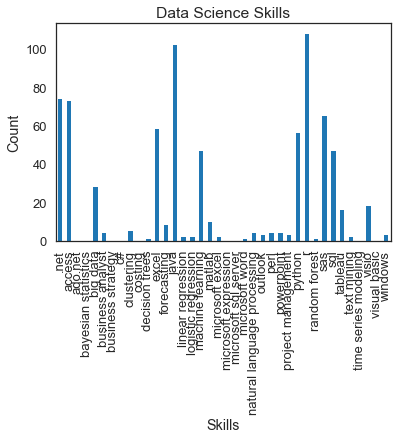

In [41]:
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()

# Another Example

## Designed by Katharine Jarmul

https://github.com/kjam/python-web-scraping-tutorial

# Scraping Happy Hours

Scrape the happy hour list of LA for personal preferences

http://www.downtownla.com/3_10_happyHours.asp?action=ALL

This example is part of her talk about data scraping at PyCon2014. She is a really good speaker and I enjoyed watching her talk. Check it out: http://www.youtube.com/watch?v=p1iX0uxM1w8

In [ ]:
stuff_i_like = ['burger', 'sushi', 'sweet potato fries', 'BBQ','beer']
found_happy_hours = []
my_happy_hours = []
# First, I'm going to identify the areas of the page I want to look at
url = 'http://www.downtownla.com/3_10_happyHours.asp?action=ALL'
source = session.get(url, verify = False).text
tables = bs4.BeautifulSoup(source, "lxml")
print (tables)

In [ ]:
# Then, I'm going to sort out the *exact* parts of the page
# that match what I'm looking for...
for t in tables.findAll('p', {'class': 'calendar_EventTitle'}):
    text = t.text
    for s in t.findNextSiblings():
        text += '\n' + s.text
    found_happy_hours.append(text)

print ("The scraper found %d happy hours!" % len(found_happy_hours))

In [ ]:
# Now I'm going to loop through the food I like
# and see if any of the happy hour descriptions match
for food in stuff_i_like:
    for hh in found_happy_hours:
        # checking for text AND making sure I don't have duplicates
        if food in hh and hh not in my_happy_hours:
            print ("YAY! I found some %s!" % food)
            my_happy_hours.append(hh)

print ("I think you might like %d of them, yipeeeee!" % len(my_happy_hours))

In [ ]:
# Now, let's make a mail message we can read:
message = 'Hey Katharine,\n\n\n'
message += 'OMG, I found some stuff for you in Downtown, take a look.\n\n'
message += '==============================\n'.join(my_happy_hours)
message = message.encode('utf-8')
# To read more about encoding:
# http://diveintopython.org/xml_processing/unicode.html
message = message.replace('\t', '').replace('\r', '')
message += '\n\nXOXO,\n Your Py Script'

print (message)

# Getting Data with an API

* API: application programming interface
* some sites try to make your life easier
* Twitter, New York Times, ImDB, rotten Tomatoes, Yelp, ...

# Rotten Tomatoes

The Wizard of Oz http://www.rottentomatoes.com/top/

# API keys

* required for data access
* identifies application (you)
* monitors usage
* limits rates

# Rotten Tomatoes Key¶

http://developer.rottentomatoes.com/member/register

In [ ]:
import json
import requests

api_key = "qz898bu98b4cd5785msv43zp"

url = 'http://api.rottentomatoes.com/api/public/v1.0/lists/dvds/top_rentals.json?apikey=' + api_key
data = session.get(url, verify = False).text
print (data)

In [ ]:
a = {'a': 1, 'b':2}
s = json.dumps(a)
a2 = json.loads(s)

## a is a dictionary
print (a)
## vs s is a string containing a in JSON encoding
print (s)
## reading back the keys are now in unicode
print (a2)

In [ ]:
## create dictionary from JSON 
dataDict = json.loads(data)

## explore dictionary
print ("Starting keys:")
print (dataDict.keys())
print ()

## there is a key named `movies` containing a list of movies as a value
movies = dataDict['movies']

## each element of the list `movies` is a dictionary
print ("Movie keys:")
print (movies[0].keys())
print ()

In [ ]:
## one of the keys is called `ratings`
## the value is yet another dictionary
print ("Movie rating keys:")
print (movies[0]['ratings'].keys())
print ()

## so we made it all the way to find the critics score
print ("Movie critics score rating:")
print (movies[0]['ratings']['critics_score'])
print ()

# Quiz

* build a list with critics scores
* build a list with audience scores

In [ ]:
# critics scores list
critics_scores = [m['ratings']['critics_score'] for m in movies]

# audience scores list
audience_scores = [m['ratings']['audience_score'] for m in movies]

The following code shows how to create a pandas data frame with the data we gathered from the webpage. Beware of the **set_index()** function in pandas. Per default it does not change the actual data frame! You need to either reassign the output or set the **inplace** argument to **True**.

In [ ]:
## create pandas data frame with critics and audience score
scores = pd.DataFrame(data=[critics_scores, audience_scores]).transpose()
scores.columns = ['critics', 'audience']

## also create a list with all movie titles
movie_titles = [m['title'] for m in movies]

## set index of dataFrame BEWARE of inplace!
scores.set_index([movie_titles])

## the line above does not changes scores!
## You need to either reassign

scores = scores.set_index([movie_titles])

## or set the inplace argument to True
scores.set_index([movie_titles], inplace=True)
scores.head(3)

In [ ]:
## create a bar plot with the data
## notice that we are using the data frame itself and call its plot function
scores.plot(kind = 'bar')

## set the title to Score Comparison
plt.title('Score Comparison')

## set the x label
plt.xlabel('Movies')

## set the y label
plt.ylabel('Scores')

In [ ]:
## show the plot
plt.show()

# Twitter Example:

* API a bit more complicated
* libraries make life easier
* python-twitter

https://github.com/bear/python-twitter

What we are going to do is scrape Joe's twitter account, and then filter it for the interesting tweets. Defining interesting as tweets that have be re-tweeted at least 10 times.

In [ ]:
!C:/Anaconda/Scripts/pip install C:/Users/502689880/Downloads/twitter-1.18.0-py2.py3-none-any.whl